# CLEANING TRAIN DATASET

In [1]:
!python -m pip install --upgrade pip


In [ ]:
# ✅ If your RAM memory leser then 16GB then you choose dask dataframe-------------
import pandas as pd 
Train = pd.read_csv("D:\mainboot\Guvi Projects\Microsoft\Dataset\GUIDE_Train.csv\GUIDE_Train.csv")
print(Train.head())
print(f'shape of data{Train.shape}')

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sures\AppData\Local\Temp\ipykernel_20888\2230049549.py:11: SyntaxWarning: invalid escape sequence '\m'
  Train = pd.read_csv("D:\mainboot\Guvi Projects\Microsoft\Dataset\GUIDE_Train.csv\GUIDE_Train.csv")


              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  AntispamDirection  \
0  ... 

### DROP MISSING VALUES COLUMNS AND FILLING MISSING VALUES 

In [2]:
# Calculate the percentage of missing values for each column
missing_percentage = Train.isnull().sum() / len(Train) * 100

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("Columns with more than 50% missing values and dropped:")
print(columns_to_drop)
Train.drop(columns=columns_to_drop, axis=1, inplace=True)
print(Train.info())
Train['IncidentGrade'] = Train['IncidentGrade'].fillna(Train['IncidentGrade'].mode()[0])
Train = Train.drop_duplicates()
print(f'duplicats {Train}')

Columns with more than 50% missing values and dropped:
Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 35 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountO

### REMOVE OUTLIERS

In [3]:
numerical_columns = Train.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
    q1 = Train[col].quantile(0.25)
    q3 = Train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2.5 * iqr
    upper_bound = q3 + 2.5 * iqr
    Train = Train[(Train[col] >= lower_bound) & (Train[col] <= upper_bound)]

In [4]:
Train['Timestamp'] = pd.to_datetime(Train['Timestamp'])
Train['Day'] = Train['Timestamp'].dt.day
Train['Month'] = Train['Timestamp'].dt.month
Train['Year'] = Train['Timestamp'].dt.year
Train['Hours'] = Train['Timestamp'].dt.hour
Train.drop(columns = 'Timestamp',inplace = True)

In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2975466 entries, 1 to 9516835
Data columns (total 38 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId  int

In [6]:
columns = ['City','State','CountryCode','OSVersion']
for col in columns:
  Train[col] = Train[col].astype(str)

# TEST DATASET CLEANING

In [7]:
Test = pd.read_csv(r"D:\mainboot\Guvi Projects\Microsoft\Dataset\GUIDE_Test.csv\GUIDE_Test.csv")
Test.info()
print(Test.isna().sum())

C:\Users\sures\AppData\Local\Temp\ipykernel_20888\1521276978.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Test = pd.read_csv(r"D:\mainboot\Guvi Projects\Microsoft\Dataset\GUIDE_Test.csv\GUIDE_Test.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [8]:
# Calculate the percentage of missing values for each column
missing_percentage = Test.isnull().sum() / len(Test) * 100

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("Columns with more than 50% missing values and dropped:")
print(columns_to_drop)
Test.drop(columns=columns_to_drop, axis=1, inplace=True)
print(Test.info())
Test = Test.drop_duplicates()
print(f'duplicats {Test}')

Columns with more than 50% missing values and dropped:
Index(['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   IncidentGrade       object
 9   EntityType          object
 10  EvidenceRole        object
 11  DeviceId            int64 
 12  Sha256              int64 
 13  IpAddress           int64 
 14  Url                 int64 
 15  AccountSid          int64 
 16  AccountUpn          int64 
 17  AccountO

In [9]:
Test = Test.drop('Usage',axis = 1)
numerical_columns = Test.select_dtypes(include=['int64','float64'])
for col in numerical_columns:
    q1 = Test[col].quantile(0.25)
    q3 = Test[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2.5 * iqr
    upper_bound = q3 + 2.5 * iqr
    Test = Test[(Test[col] >= lower_bound) & (Test[col] <= upper_bound)]

In [10]:
Test['Timestamp'] = pd.to_datetime(Test['Timestamp'])
Test['Day'] = Test['Timestamp'].dt.day
Test['Month'] = Test['Timestamp'].dt.month
Test['Year'] = Test['Timestamp'].dt.year
Test['Hours'] = Test['Timestamp'].dt.hour
Test.drop(columns = 'Timestamp',inplace = True)

In [11]:
merged_data = pd.concat([Train,Test],axis = 0,ignore_index=True)

In [15]:
merged_data.shape

(4265164, 38)

# EDA 

In [16]:
merged_data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,Day,Month,Year,Hours
count,4.265164e+06,4.265164e+06,4.265164e+06,4.265164e+06,4.265164e+06,4.265164e+06,4265164.0,4265164.0,4.265164e+06,4265164.0,...,4265164.0,4265164.0,4265164.0,4265164.0,4265164.0,4265164.0,4.265164e+06,4.265164e+06,4.265164e+06,4.265164e+06
mean,8.384498e+11,7.431667e+01,2.890025e+04,3.869600e+05,1.708568e+01,2.015890e+01,98799.0,138268.0,2.721314e+05,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,9.816061e+00,5.878197e+00,2.024000e+03,1.182875e+01
std,4.956006e+11,1.086880e+02,5.815024e+04,4.363777e+05,2.834775e+01,3.616988e+01,0.0,0.0,1.496398e+05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.764934e+00,3.299879e-01,4.079977e-03,6.899900e+00
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,98799.0,138268.0,4.000000e+00,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,1.000000e+00,1.000000e+00,2.023000e+03,0.000000e+00
25%,4.037269e+11,2.000000e+00,2.110000e+02,1.054000e+04,0.000000e+00,0.000000e+00,98799.0,138268.0,1.343385e+05,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,5.000000e+00,6.000000e+00,2.024000e+03,6.000000e+00
50%,8.332237e+11,2.300000e+01,1.121000e+03,1.987460e+05,5.000000e+00,5.000000e+00,98799.0,138268.0,3.606060e+05,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,8.000000e+00,6.000000e+00,2.024000e+03,1.200000e+01
75%,1.271310e+12,1.000000e+02,2.149500e+04,5.940042e+05,1.900000e+01,2.000000e+01,98799.0,138268.0,3.606060e+05,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,1.200000e+01,6.000000e+00,2.024000e+03,1.800000e+01
max,1.709397e+12,5.200000e+02,2.822150e+05,1.719796e+06,1.690000e+02,2.680000e+02,98799.0,138268.0,3.606060e+05,160396.0,...,3421.0,881.0,289573.0,117668.0,3586.0,5.0,3.100000e+01,1.200000e+01,2.024000e+03,2.300000e+01


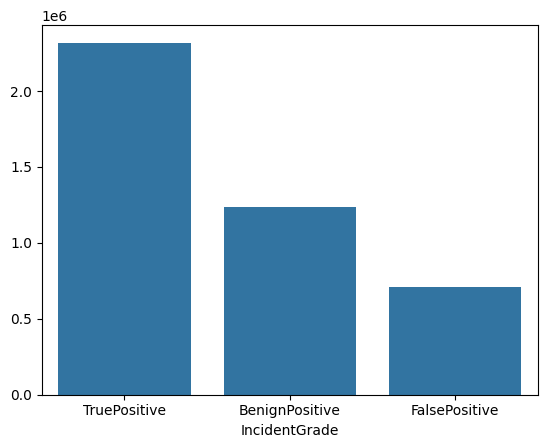

In [17]:
import seaborn as se
import matplotlib.pyplot as plt
se.barplot(x=merged_data['IncidentGrade'].value_counts().index,
           y=merged_data['IncidentGrade'].value_counts().values)
plt.show()

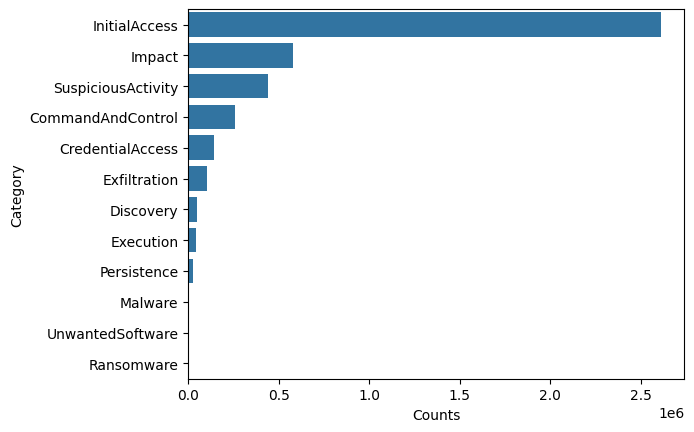

In [19]:
new = merged_data['Category'].value_counts()
se.barplot(x = new.values,y = new.index)
plt.xlabel('Counts')
plt.ylabel('Category')
plt.show()

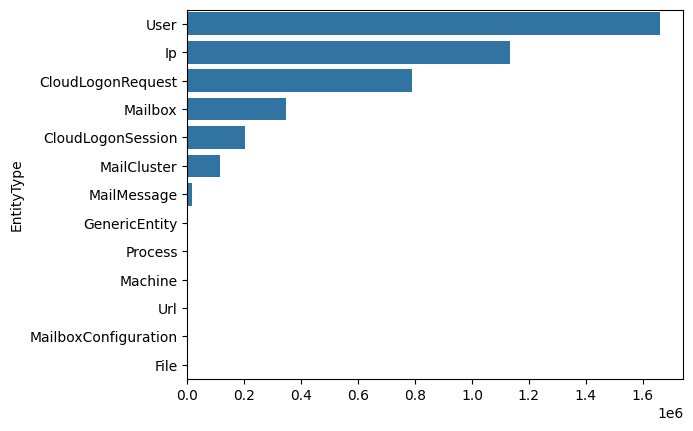

In [20]:
new = merged_data['EntityType'].value_counts()
se.barplot(x = new.values,y =new.index)
plt.show()

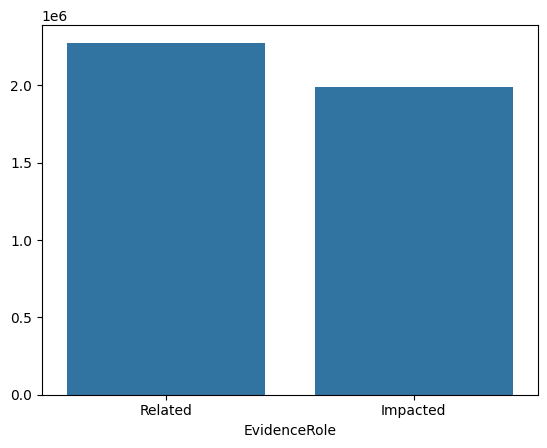

In [21]:
new = merged_data['EvidenceRole'].value_counts()
se.barplot(x = new.index,y = new.values)
plt.show()

In [22]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_data['Category'], merged_data['EvidenceRole'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("Reject the null hypothesis - Variables are dependent.")
else:
    print("Fail to reject the null hypothesis - Variables are independent.")


Chi-Square Statistic: 664231.1328987258
P-value: 0.0
Degrees of Freedom: 11
Expected Frequencies:
 [[1.20333345e+05 1.37745655e+05]
 [6.59812367e+04 7.55287633e+04]
 [2.26810210e+04 2.59629790e+04]
 [2.11745170e+04 2.42384830e+04]
 [4.94423317e+04 5.65966683e+04]
 [2.69136863e+05 3.08081137e+05]
 [1.21742865e+06 1.39359135e+06]
 [2.92301868e+03 3.34598132e+03]
 [1.32647884e+04 1.51842116e+04]
 [2.87219573e+02 3.28780427e+02]
 [2.04264872e+05 2.33822128e+05]
 [1.78113437e+03 2.03886563e+03]]
Reject the null hypothesis - Variables are dependent.


In [23]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_data['Category'], merged_data['IncidentGrade'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("Reject the null hypothesis - Variables are dependent.")
else:
    print("Fail to reject the null hypothesis - Variables are independent.")

Chi-Square Statistic: 945672.7433337054
P-value: 0.0
Degrees of Freedom: 22
Expected Frequencies:
 [[7.48841430e+04 4.29285958e+04 1.40266261e+05]
 [4.10605089e+04 2.35386281e+04 7.69108630e+04]
 [1.41145318e+04 8.09139301e+03 2.64380752e+04]
 [1.31770256e+04 7.55395179e+03 2.46820226e+04]
 [3.07682517e+04 1.76384184e+04 5.76323299e+04]
 [1.67485441e+05 9.60138494e+04 3.13718709e+05]
 [7.57612959e+05 4.34314386e+05 1.41909265e+06]
 [1.81901159e+03 1.04277902e+03 3.40720939e+03]
 [8.25475526e+03 4.73217745e+03 1.54620673e+04]
 [1.78738418e+02 1.02464807e+02 3.34796775e+02]
 [1.27115223e+05 7.28709417e+04 2.38100836e+05]
 [1.10841032e+03 6.35414877e+02 2.07617481e+03]]
Reject the null hypothesis - Variables are dependent.


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_data['Category'],merged_data['EntityType'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("Reject the null hypothesis - Variables are dependent.")
else:
    print("Fail to reject the null hypothesis - Variables are independent.")

Chi-Square Statistic: 3692750.6355378507
P-value: 0.0
Degrees of Freedom: 132
Expected Frequencies:
 [[4.76766433e+04 1.23412081e+04 4.23560032e-01 6.11136617e+01
  6.86057126e+04 2.02098644e+01 7.02952331e+03 9.11380172e+02
  2.09533938e+04 6.05085760e-01 4.08432888e+01 4.41712605e+00
  1.00433526e+05]
 [2.61420797e+04 6.76693712e+03 2.32246638e-01 3.35098721e+01
  3.76179170e+04 1.10814824e+01 3.85443156e+03 4.99728409e+02
  1.14891748e+04 3.31780912e-01 2.23952115e+01 2.42200065e+00
  5.50697588e+04]
 [8.98632836e+03 2.32613165e+03 7.98346793e-02 1.15190037e+01
  1.29311423e+04 3.80925470e+00 1.32495915e+03 1.71781420e+02
  3.94939877e+03 1.14049542e-01 7.69834407e+00 8.32561655e-01
  1.89302053e+04]
 [8.38944433e+03 2.17162685e+03 7.45319523e-02 1.07538960e+01
  1.20722384e+04 3.55623887e+00 1.23695358e+03 1.60371467e+02
  3.68707439e+03 1.06474218e-01 7.18700969e+00 7.77261789e-01
  1.76728355e+04]
 [1.95892869e+04 5.07073171e+03 1.74031526e-01 2.51102631e+01
  2.81885824e+04 8.30

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(merged_data['IncidentGrade'], merged_data['EvidenceRole'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p < 0.05:
    print("Reject the null hypothesis - Variables are dependent.")
else:
    print("Fail to reject the null hypothesis - Variables are independent.")

Chi-Square Statistic: 27555.033016002842
P-value: 0.0
Degrees of Freedom: 2
Expected Frequencies:
 [[ 577040.44199027  660538.55800973]
 [ 330798.14952883  378664.85047117]
 [1080860.40848089 1237261.59151911]]
Reject the null hypothesis - Variables are dependent.


In [29]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install imblearn

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4265164 entries, 0 to 4265163
Data columns (total 38 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  DeviceId            int64 
 11  Sha256              int64 
 12  IpAddress           int64 
 13  Url                 int64 
 14  AccountSid          int64 
 15  AccountUpn          int64 
 16  AccountObjectId     int64 
 17  AccountName         int64 
 18  DeviceName          int64 
 19  NetworkMessageId    int64 
 20  RegistryKey         int64 
 21  RegistryValueName   int64 
 22  RegistryValueData   int64 
 23  ApplicationId       int64 
 24  ApplicationName     int64 
 25  OAuthApplicationId

### PREPROCESSING 

In [27]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
le = LabelEncoder()

columns_to_encode = ['State', 'City', 'OSVersion', 'CountryCode']
merged_data[columns_to_encode] = merged_data[columns_to_encode].astype(str)
merged_data= pd.get_dummies(merged_data, columns=columns_to_encode)
le_variable = ['Category','IncidentGrade','EvidenceRole','EntityType']
for col in le_variable:
  if col in merged_data.columns:
    merged_data[col] = le.fit_transform(merged_data[col])
merged_data.drop_duplicates(inplace=True)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

X = merged_data.drop(columns=['IncidentGrade'])  
y = merged_data['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
# Fit the scaler on training data and transform both train & test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Add target column back
train_final = pd.concat([X_train_scaled_df, y_train_resampled.reset_index(drop=True)], axis=1)
test_final = pd.concat([X_test_scaled_df, y_test.reset_index(drop=True)], axis=1)

In [37]:
# Save as CSV
train_final.to_csv('D:\mainboot\Guvi Projects\Microsoft\data\Train_data.csv', index=False)
test_final.to_csv('D:\mainboot\Guvi Projects\Microsoft\data\Test_data.csv', index=False)

print("Train and Test datasets saved successfully as CSV files!")

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sures\AppData\Local\Temp\ipykernel_20888\2571420924.py:2: SyntaxWarning: invalid escape sequence '\m'
  train_final.to_csv('D:\mainboot\Guvi Projects\Microsoft\data\Train_data.csv', index=False)
C:\Users\sures\AppData\Local\Temp\ipykernel_20888\2571420924.py:3: SyntaxWarning: invalid escape sequence '\m'
  test_final.to_csv('D:\mainboot\Guvi Projects\Microsoft\data\Test_data.csv', index=False)


Train and Test datasets saved successfully as CSV files!


In [2]:
import pandas as pd
train =pd.read_csv(r'D:\mainboot\Guvi Projects\Microsoft\data\Train_data.csv')
test = pd.read_csv(r'D:\mainboot\Guvi Projects\Microsoft\data\Test_data.csv')

# MODEL DEVELOPMENT

In [3]:
import pandas as pd
from dask_ml.wrappers import ParallelPostFit
from dask_ml.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder
from dask_ml.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import dask.dataframe as dd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import cross_val_score

In [1]:
import pandas as pd
train = pd.read_csv(r'D:\mainboot\Guvi Projects\Microsoft\data\Train_data.csv')
test = pd.read_csv(r'D:\mainboot\Guvi Projects\Microsoft\data\Test_data.csv')
X_train = train.drop('IncidentGrade',axis = 1)
y_train = train['IncidentGrade']
X_test = test.drop('IncidentGrade',axis=1)
y_test = test['IncidentGrade']

In [2]:
train.shape

(5563494, 38)


### IF DON'T HAVE TO MUCH OF RAM THEN DO THIS STEPS

In [3]:
# Select 260,000 samples each class
df_balanced_train = (
    train.groupby('IncidentGrade', group_keys=False)  # Avoids multi-index issues
         .apply(lambda x: x.sample(n=260000, random_state=42))
         .reset_index(drop=True)
)

# Check new class distribution
print(df_balanced_train['IncidentGrade'].value_counts())


IncidentGrade
0    260000
1    260000
2    260000
Name: count, dtype: int64


C:\Users\sures\AppData\Local\Temp\ipykernel_31212\2898808796.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=260000, random_state=42))


In [4]:
# Split Feature and Target on Train dataset
X_train = df_balanced_train.drop(columns=['IncidentGrade'])
y_train = df_balanced_train['IncidentGrade']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train on SMOTE data
    
    y_pred = model.predict(X_test)  # Predict on original test set
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Training Logistic Regression...
Accuracy: 0.6657
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.54      0.57    247516
           1       0.38      0.64      0.47    141893
           2       0.87      0.74      0.80    463624

    accuracy                           0.67    853033
   macro avg       0.62      0.64      0.62    853033
weighted avg       0.71      0.67      0.68    853033


Training Random Forest...
Accuracy: 0.9697
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96    247516
           1       0.96      0.96      0.96    141893
           2       1.00      0.97      0.98    463624

    accuracy                           0.97    853033
   macro avg       0.96      0.97      0.96    853033
weighted avg       0.97      0.97      0.97    853033


Training XGBoost...


c:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9545
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94    247516
           1       0.93      0.94      0.93    141893
           2       0.99      0.95      0.97    463624

    accuracy                           0.95    853033
   macro avg       0.94      0.95      0.95    853033
weighted avg       0.96      0.95      0.95    853033



In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred = best_rf.predict(X_test)
    
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9700
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96    247516
           1       0.96      0.96      0.96    141893
           2       1.00      0.97      0.98    463624

    accuracy                           0.97    853033
   macro avg       0.96      0.97      0.97    853033
weighted avg       0.97      0.97      0.97    853033



In [7]:
!pip install optuna


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Define Optuna Objective Function
def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
    # Initialize Model
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    
    # Train Model
    rf.fit(X_train, y_train)
    
    # Predict & Evaluate
    y_pred = rf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')  # Optimize for F1 score
    
    return f1  # Optuna will maximize this

# Run Optuna Optimization
study = optuna.create_study(direction='maximize')  # We want to maximize F1 Score
study.optimize(objective, n_trials=10)  # Try 10 different hyperparameter sets

# Best Hyperparameters
print("Best Hyperparameters:", study.best_params)

# Train Final Model with Best Params
best_params = study.best_params
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Make Predictions
y_pred = best_rf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")


c:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-01 06:21:30,714] A new study created in memory with name: no-name-3b5a1a01-9f06-4985-97b2-d31597a5f15b
[I 2025-03-01 06:24:15,426] Trial 0 finished with value: 0.9443858046456267 and parameters: {'n_estimators': 288, 'max_depth': 34, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.9443858046456267.
[I 2025-03-01 06:29:47,447] Trial 1 finished with value: 0.9478748748456916 and parameters: {'n_estimators': 489, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9478748748456916.
[I 2025-03-01 06:32:28,010] Trial 2 finished with value: 0.9608883083608125 and parameters: {'n_estimators

Best Hyperparameters: {'n_estimators': 137, 'max_depth': 33, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Accuracy: 0.9676
F1 Score (Macro): 0.9629


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# Define a larger hyperparameter space
param_dist = {
    'n_estimators': [100, 300, 500, 800],  # More trees may improve generalization
    'max_depth': [10, 20, 30, None],  # Deeper trees can capture more patterns
    'min_samples_split': [2, 5, 10],  # Controls overfitting
    'min_samples_leaf': [1, 2, 4],  # Prevents deep overfitted trees
    'max_features': ['sqrt', 'log2'],  # Controls number of features per split
    'bootstrap': [True, False],  # Controls resampling of data
    'criterion': ['gini', 'entropy']  # Different tree splitting criteria
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, 
    n_iter=20,  # Number of random searches (increase for better results)
    cv=5, 
    scoring='f1_macro',  # Optimize for F1 score
    n_jobs=-1, 
    verbose=1, 
    random_state=42
)
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_

# Print best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1_macro:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Accuracy: 0.9720
F1 Score (Macro): 0.9676
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    247516
           1       0.96      0.96      0.96    141893
           2       1.00      0.97      0.98    463624

    accuracy                           0.97    853033
   macro avg       0.96      0.97      0.97    853033
weighted avg       0.97      0.97      0.97    853033

